In [1]:
'''Importar las librerias usadas para este algoritmo.'''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

'''Importar las librerias para realizar la matriz de confusión.'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
'''
Usaremos un dataset de muestra 
sobre el uso de internet en la 
poblacion española, con mas de 
2500 registros.'''
df = pandas.read_csv('uso_internet_espana.csv')

In [3]:
'''Imprimimos 10 registros aleatorios para comprobar los datos.'''
df.sample(10)

,Unnamed: 0,uso_internet,sexo,edad,estudios
1774,1791,0,Hombre,49,Primaria
2419,2440,1,Hombre,49,Medios universitarios
1078,1087,0,Hombre,23,Primaria
42,44,1,Hombre,22,Medios universitarios
822,830,1,Mujer,20,Secundaria
1462,1477,0,Hombre,60,Primaria
1073,1082,0,Mujer,24,Primaria
1331,1345,1,Mujer,42,Superiores
2322,2343,1,Hombre,18,Secundaria
1929,1946,0,Mujer,60,Primaria


In [4]:
'''Transformacion de los datos para 
que no existan string en el dataset 
mediante la funcion get_dummies de pandas'''
df = pandas.get_dummies(data=df, drop_first=True)

In [6]:
'''Creacion de las variables: Caracteristicas y objetivo, es decir 'X' y 'y' '''
X = df.drop(columns='uso_internet')
y = df.uso_internet

      Unnamed: 0  edad  sexo_Mujer  estudios_Medios universitarios  \
0              1    66           1                               0   
1              2    72           0                               0   
2              3    48           0                               1   
3              4    59           0                               0   
4              5    44           1                               0   
...          ...   ...         ...                             ...   
2450        2471    43           0                               0   
2451        2472    18           1                               0   
2452        2473    54           1                               0   
2453        2474    31           0                               0   
2454        2475    52           0                               0   

      estudios_Primaria  estudios_Secundaria  estudios_Sin estudios  \
0                     1                    0                      0   
1                

In [7]:
'''Imprimir los datos para verificar 
el dataset que sera entrenado'''
print(X, y, sep='\n\n')

      Unnamed: 0  edad  sexo_Mujer  estudios_Medios universitarios  \
0              1    66           1                               0   
1              2    72           0                               0   
2              3    48           0                               1   
3              4    59           0                               0   
4              5    44           1                               0   
...          ...   ...         ...                             ...   
2450        2471    43           0                               0   
2451        2472    18           1                               0   
2452        2473    54           1                               0   
2453        2474    31           0                               0   
2454        2475    52           0                               0   

      estudios_Primaria  estudios_Secundaria  estudios_Sin estudios  \
0                     1                    0                      0   
1                

In [15]:
'''Con ayuda de la libreria DecisionTreeClassifier, 
realizaremos el algoritmo de DecisionTree, con una 
profundidad de 3 niveles para observar el 
comportamiento de los datos'''
dtree = DecisionTreeClassifier(max_depth=3)

In [16]:
'''Entrenamiento del modelo con 
la funcion fit, enviando los 
parametros de X,y'''
dtree = dtree.fit(X, y)

In [17]:
'''Observar de manera grafica el arbol de decision generado por el modelo.'''
data = tree.export_graphviz(dtree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(data)

In [18]:
'''Guardar la imagen generada del arbol de decision'''
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


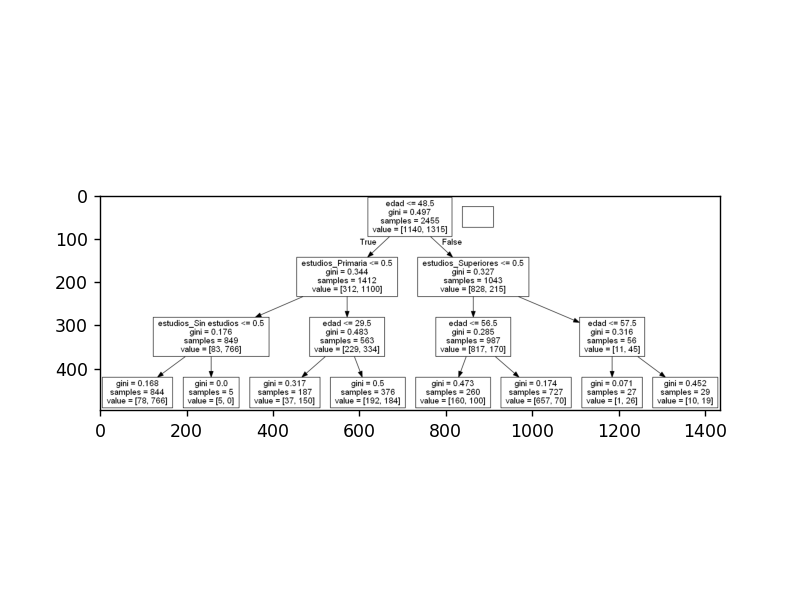

In [19]:
'''Mostrar la imagen en la consola de Jupyter para su posterior analisis.'''
plt.close()
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [20]:
'''Prediccion del modelo mediante el 
arbol de decision y la libreria 
DecisionTreeClassifier'''
y_pred = dtree.predict(X)
print(y_pred)

[0 0 1 ... 0 1 0]


In [21]:
'''
Para obtener el Accuracy del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.8044806517311609


In [ ]:

print("Precision:", metrics.precision_score(y, y_pred))

In [ ]:
print("Recall:", metrics.recall_score(y, y_pred))